In [3]:
!pip3 install surprise

     |████████████████████████████████| 11.8MB 9.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618288 sha256=38adcfc1867a401add62ae2829f3d82482200b4db1163e9632ffa39d1afc44fc
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [4]:
# Upload Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import surprise
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader

In [5]:
# Load data 
data = np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt').astype(int)
movies = pd.read_csv('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt', sep = '\t', lineterminator='\r', encoding='latin-1', header=None)
Y_train = np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/train.txt').astype(int)
Y_test = np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/test.txt').astype(int)

Text(0, 0.5, 'Frequency')

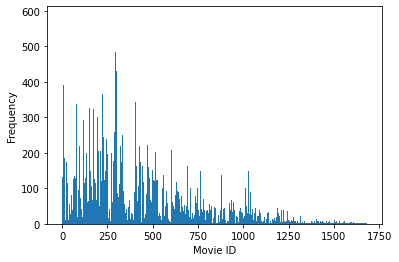

In [8]:
# Histogram of number of ratings for each movie 
fig_rn = plt.hist(data[:,1], bins=range(1,max(data[:,1])))

plt.xlabel("Movie ID")
plt.ylabel("Frequency")

Text(0, 0.5, 'Average Rating')

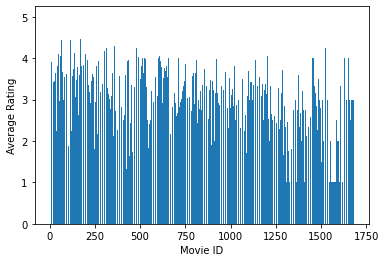

In [9]:
# Plot average rating for all movies
num_mov = max(data[:,1])+1
movID = np.array([i for i in range(1,num_mov+1)])

count = np.zeros(num_mov)
avg_rat = np.zeros(num_mov)


for i in range(1, num_mov):
  ind = np.where(data[:,1]==i)[0]
  count[i] = len(ind)
  avg_rat[i] = np.sum(data[ind,2])/count[i]

plt.bar(movID, avg_rat)

plt.xlabel("Movie ID")
plt.ylabel("Average Rating")

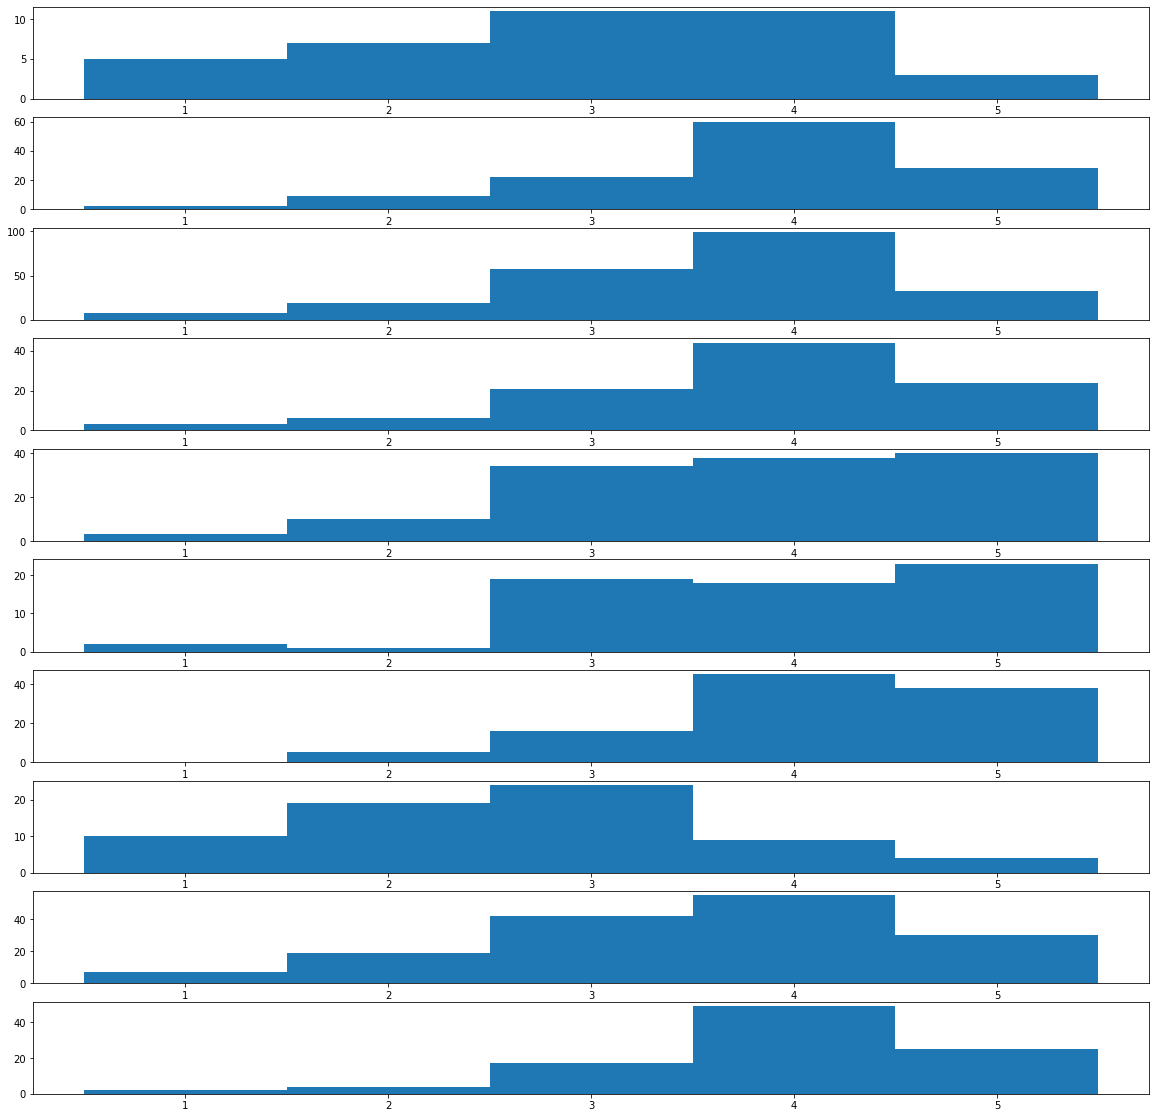

In [10]:
# Ratings of K most frequently rated movies
K = 10
rating_bins = np.linspace(0.5, 5.5, 6)

# Subplots
fig, axs = plt.subplots(K,1,figsize=(20,20))

ind = fig_rn[0].argsort()[-K:][::-1]
for i in range(K):
  axs[i].hist(data[np.where(data[:,1] == fig_rn[0][ind[i]])[0],2], bins=rating_bins)

plt.show()

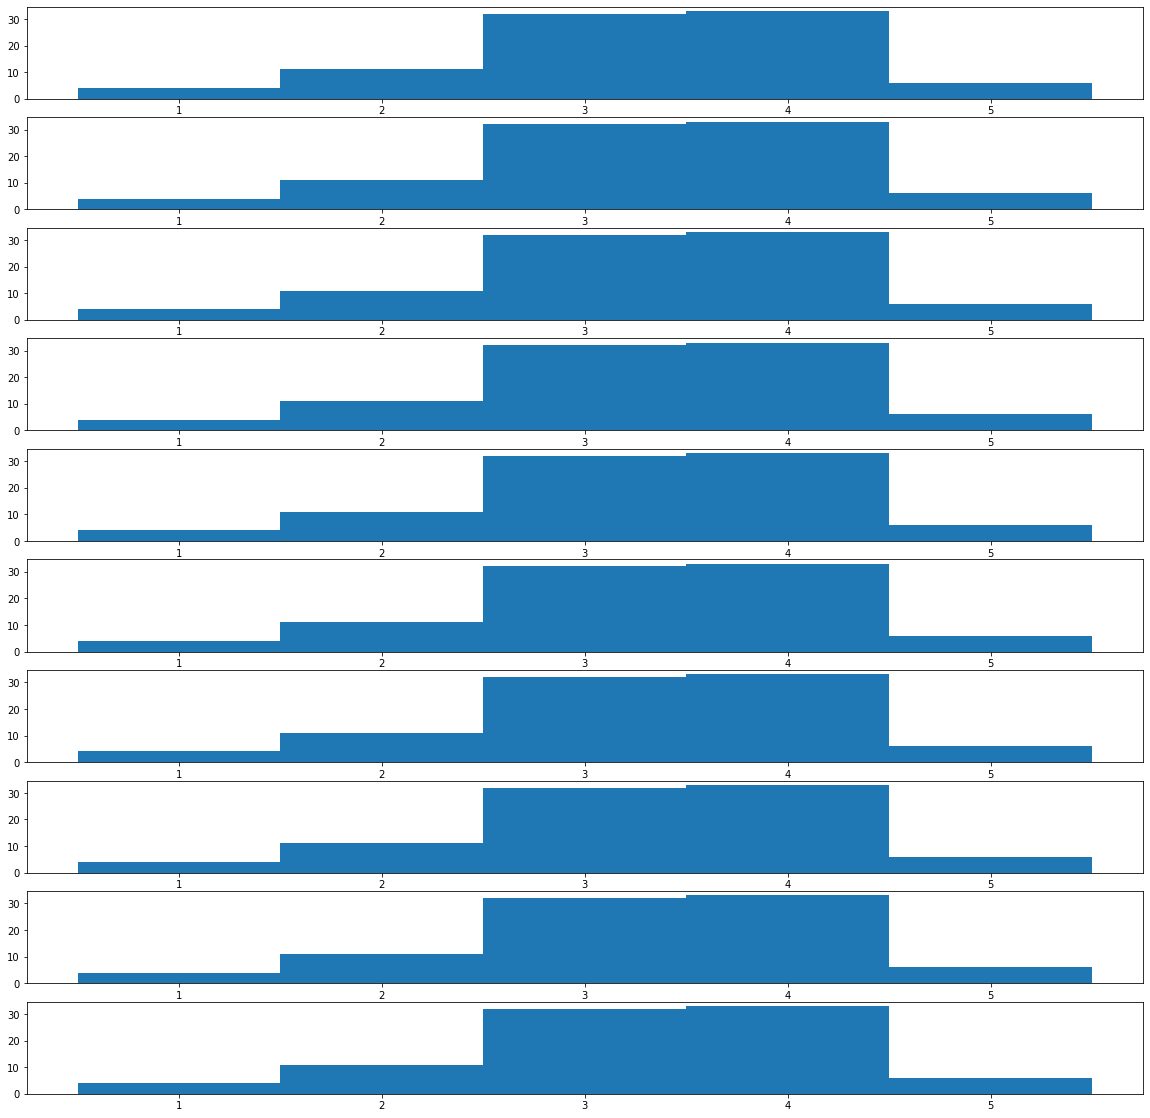

In [11]:
# Ratings of K best rated movies
K = 10
rating_bins = np.linspace(0.5, 5.5, 6)

# Subplots
fig, axs = plt.subplots(K,1,figsize=(20,20))

ind = avg_rat.argsort()[-K:][::-1]
for i in range(K):
  axs[i].hist(data[np.where(data[:,1] == avg_rat[ind[i]])[0],2], bins=rating_bins)

plt.show()

Text(0, 0.5, 'Movies ID')

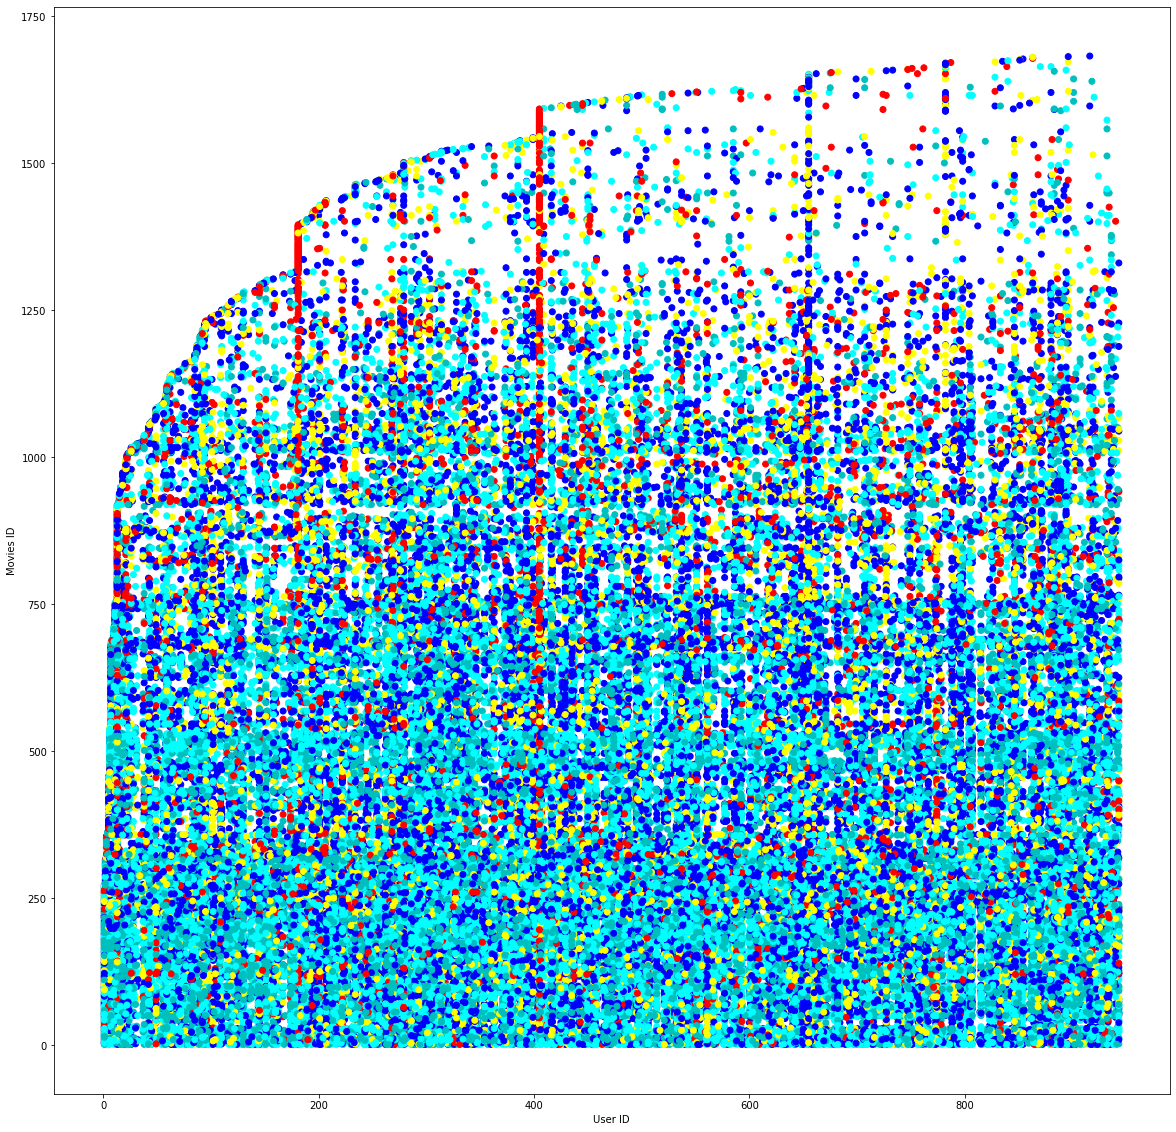

In [12]:
# Scatter plot of different ratings as colors between users and movies
fig = plt.figure(figsize=(20,20))

colors = ['r', 'yellow', 'b', 'aqua', 'c']
cs = [None] * len(data)

# create color array
for i in range(len(data)):
  cs[i] = colors[data[i,2]-1]

# Scatter plot
plt.scatter(data[:,0], data[:,1], c=cs)
plt.xlabel("User ID")
plt.ylabel("Movies ID")

# NOTES:
# Some users give the same rating to all movies.  Data might look more interesting by only considering Users whose ratings satisfy a certain stdev threshold

In [13]:
# Turn data into Surprise sets
data_df = pd.DataFrame(data)
dataset = Dataset.load_from_df(data_df, surprise.reader.Reader())
train_set = dataset.build_full_trainset()

In [14]:
# Number of latent factors
n_factors = 100

# Biased SVD
algo = SVD(n_factors=n_factors)
svd_biased = algo.fit(train_set)

# Un-biased SVD
algo = SVD(n_factors=n_factors, biased=False)
svd_unbiased = algo.fit(train_set)

In [15]:
# Convert data to matrix form
data_mat = np.zeros((max(data[:,0]), max(data[:,1])))
for i in range(len(data)):
  data_mat[data[i,0]-1, data[i,1]-1] = data[i,2]

In [27]:
cs = ['r', 'b', 'g', 'y']

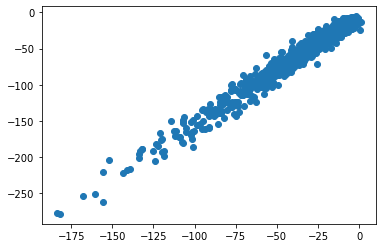

In [16]:
# Plot data by first two principal components using V.T
data_pca_VT = np.matmul(data_mat, svd_unbiased.qi)
plt.scatter(data_pca_VT[:,0], data_pca_VT[:,1])

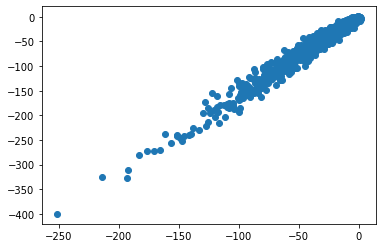

In [37]:
# Plot data by first two principal components using U
data_pca_U = np.matmul( svd_unbiased.pu.T, data_mat).T
plt.scatter(data_pca_U[:,0], data_pca_U[:,1])

In [18]:
# Create genre table
mov_gr = np.zeros((max(data[:,1]),2))
for i in range(max(data[:,1])):
  mov_gr[i,0] = i+1
  for j in range(2,21):
    if movies[j][i] == 1:
      mov_gr[i,1] = j
      break

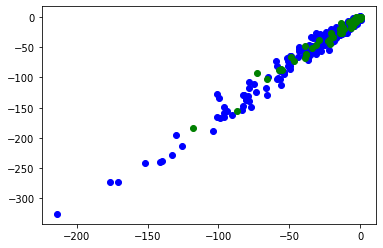

In [38]:
start = 2
end = 5
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(data_pca_U[ind,0], data_pca_U[ind,1], c = cs[ci])
  ci += 1

plt.show()

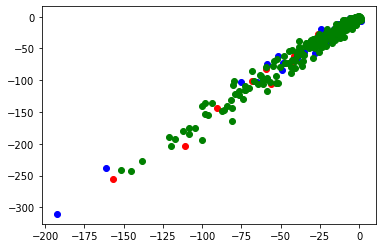

In [39]:
start = 5
end = 8
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(data_pca_U[ind,0], data_pca_U[ind,1], c = cs[ci])
  ci += 1

plt.show()

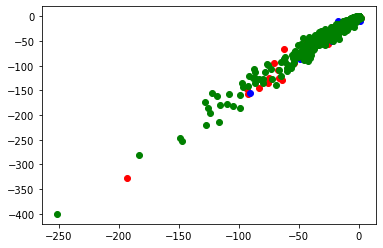

In [40]:
start = 8
end = 11
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(data_pca_U[ind,0], data_pca_U[ind,1], c = cs[ci])
  ci += 1

plt.show()

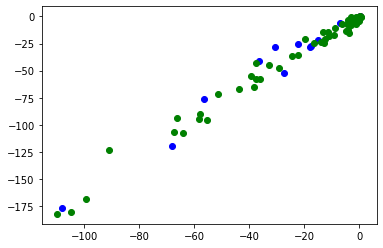

In [41]:
start = 11
end = 14
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(data_pca_U[ind,0], data_pca_U[ind,1], c = cs[ci])
  ci += 1

plt.show()

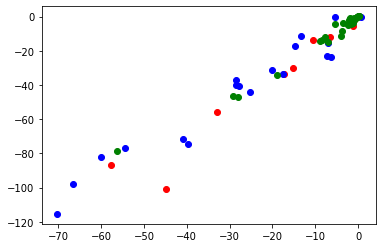

In [42]:
start = 14
end = 17
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(data_pca_U[ind,0], data_pca_U[ind,1], c = cs[ci])
  ci += 1

plt.show()

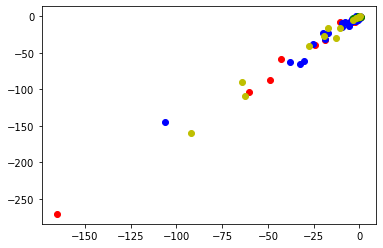

In [43]:
start = 17
end = 21
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(data_pca_U[ind,0], data_pca_U[ind,1], c = cs[ci])
  ci += 1

plt.show()

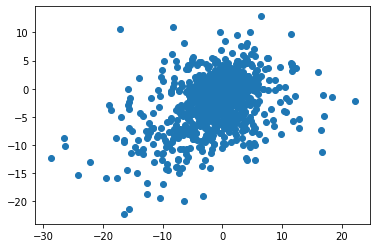

In [26]:
# Plot data by first two principal components using U
biased_pca = np.matmul( svd_biased.pu.T, data_mat).T
plt.scatter(biased_pca[:,0], biased_pca[:,1])

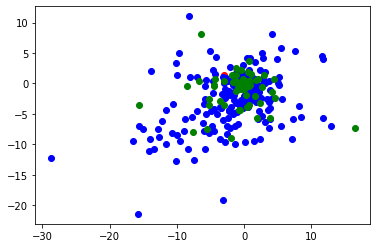

In [30]:
start = 2
end = 5
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(biased_pca[ind,0], biased_pca[ind,1], c = cs[ci])
  ci += 1

plt.show()

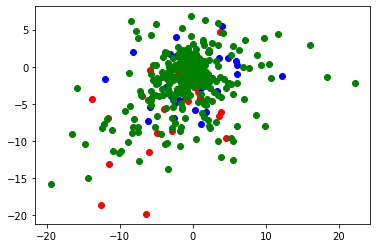

In [31]:
start = 5
end = 8
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(biased_pca[ind,0], biased_pca[ind,1], c = cs[ci])
  ci += 1

plt.show()

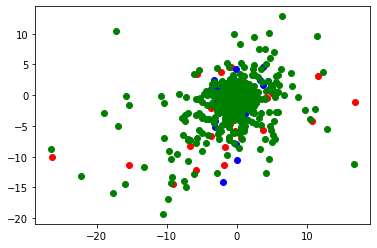

In [32]:
start = 8
end = 11
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(biased_pca[ind,0], biased_pca[ind,1], c = cs[ci])
  ci += 1

plt.show()

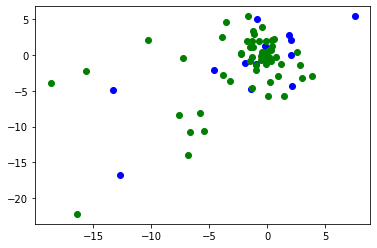

In [33]:
start = 11
end = 14
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(biased_pca[ind,0], biased_pca[ind,1], c = cs[ci])
  ci += 1

plt.show()

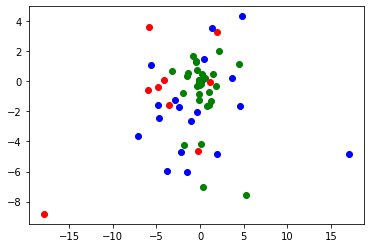

In [34]:
start = 14
end = 17
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(biased_pca[ind,0], biased_pca[ind,1], c = cs[ci])
  ci += 1

plt.show()

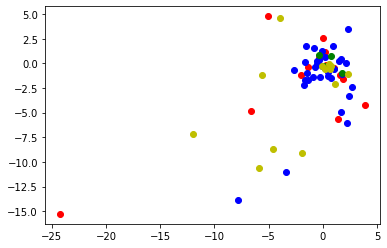

In [35]:
start = 17
end = 21
ci = 0
for i in range(start, end):
  ind = np.where(mov_gr[:,1] == i)[0]-1
  plt.scatter(biased_pca[ind,0], biased_pca[ind,1], c = cs[ci])
  ci += 1

plt.show()